#  <font face="times"><font size="6pt"><p style = 'text-align: center;'> Introduction to BMPL Data Analysis Tutorial

<font face="times"><font size="3pt"><p style = 'text-align: center;'> In this tutorial, you will learn how to load data into Python, plot it, and perform some basic analyses.

<font face="times"><font size="3pt"><p style = 'text-align: left;'> *A Note about Running Jupyter Notebooks. Upon opening, a notebook will usually run every cell, but for tutorials, it is good practice to run each cell again individually by hitting run (the play button) which will run each cell, or by pressing shift-enter starting with the first cell. To add a cell to the notebook, go to the Insert menu up top and select to insert a cell above or below your current location. You may need to add cells in order to complete tasks or practice your own code.*
    
___
___
   


### Loading modules

Python has two types of files: scripts and modules, both with the .py extension. When we use Jupyter Notebooks, however, we will only ever encouter modlules since the notebook itself replaces the script. A module is a separate code document that can contain functions, classes, variable definitions, and documention (among other things). In this notebook, we will need to load some BMPL specific modules that contain predefined functions we need to run BMPL data analysis. The first module we'll need is an data input module called load_picoscope_magnetic.py. When we load a module, we place everything that is in the module (in this case, functions that we'll need to use) in the memory space of the Juypter Notebook. It is like downloading knowledge of how to do something that the notebook previously did not know how to do (like how Neo can download knowledge of how to use Kung Fu in The Matrix). Let’s load this module. <br> <br> In the cell below, we are importing the load_picoscope_magnetic module. Hit ctrl+enter to run it, or press the play button at the top bar of Jupyter. This will automatically run the script in whatever cell you have selected. While it is running to the left of the cell will be ln[\*], and when it completes the asterix will be replaced with a number. This loads the module (import) and gives it an alias (a nickname) called lpm.

In [3]:
import load_picoscope_magnetic as lpm

### Calling functions

Inside this module is a definition for a function called load_picoscope_magnetic(). This function takes two arguments, a date---written as a string---and a number---which shot data to load. There are 10 separate datafiles included in this tutorial, labeled as 1 to 10. The function will load the specific raw data file requested, run its analyisis and return seven things: seven numpy arrays that contain the processed data including a time array, three dB/dt arrays and three magnetic field arrays.

Now, let’s run the function defined inside the module. This command in the cell below simultaneously declares seven variables (time, bxdot, bydot, bzdot, bx, by, bz) and fills them with numbers from the first shot of June 16, 2015. Note that I had to type lpm. before my function name. This is because the function load_picoscope_magnetic() exists inside the loaded module load_magnetic_picoscope.py which we nicknamed lpm.  If instead of “…=lpm.load_picoscope_magnetic()”, we typed “…=load_picoscope_magnetic()”, python wouldn’t understand what we were asking.


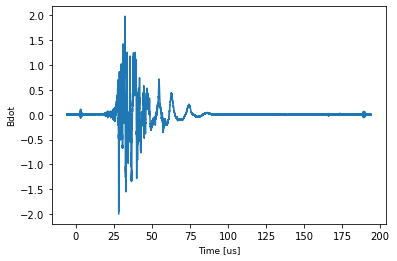

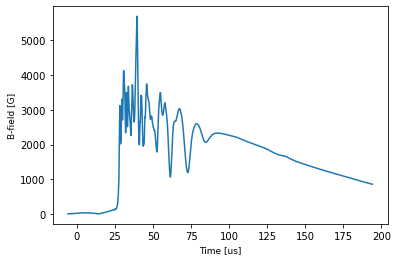

In [4]:
time, bxdot, bydot, bzdot, bx, by, bz, btot = lpm.load_picoscope_magnetic('061615', 1)

In addition to the output arrays, this function also plots some of the data which can be used to make sure the data was loaded in correctly. The two plots above are example visualizations of dBx/dt and total B-field magnitude for the Shot 1, both as functions of time.

___
###### Exercise #1

In this exercise, you will try two alternative ways of inputing arguments and receiving outputs. In the function call above, we specifically gave names to all seven output variables. This is not necessary and a single output variable can be used. Rather than seven separate arrays, however, the function will output a single multi-dimensional array. Additinally, for the input argument, we put the arguments directly inside the function---inside the pararenthesis. It is often useful to predefine a variable first outside of the function call. This can make it easier to change arguements later, as well as make it more clear what the argument actually is. For example, rather than putting a 1 inside the function, we can define a variable as 

<code> shot = 1 </code>

and then insert the variable shot into the function rather than the number itself.

Now, add a cell below using the Insert menu to begin this exercise. Define a variable for shot and a variable for the data, the latter written as a string, meaning inside single quote. Then, write a function call that uses only 1 output variable (name it whatever you want) and the variables as arguments. Run the code and see that you get the same plots as above. Then, try changing the shot number (but not the date---there's only one date) and rerun the cell.

___
### Working with Arrays

Now we have our seven variables loaded into our memory and we can begin working with them. For example, the cell below contains the variable *bx*. Hit enter see what you get. You should see a few numbers displayed. These are the first few and last few numbers of the ‘bx’ array.  An array is a collection of elements of the same type.  So the array ‘bx’ is a collection of data of the x-component of magnetic field ‘b’. You can also try this with the other variables.

In [3]:
bx

array([-7.89052545e-02, -9.17772872e-02, -1.04649320e-01, ...,
        8.46233417e+02,  8.46110489e+02,  8.45962314e+02])

Now that our ‘load data function’ is working, we’ll build our first script to load in multiple shots at once. Go to the file menu and select new notebook. This should appear as a new tab. Save this file as load_shots.py in the same directory as load_picoscope_magnetic.py

As I mentioned, a script is nothing more than a list of commands of functions to run and variables to define. We could just input everything we want to do one step at a time in the cell every time, but that is time consuming and difficult to replicate. Instead, we’ll just run a script which will go through our list of commands automatically.

To start with, we must import any and all modules that our script will use. I didn’t mention it initially, but the module we generated has a number of other modules that were loaded in as well. These are modules such as ‘numpy’, ‘scipy’, and ‘matplotlib’ which contain all the functions and data structures (such as arrays) that we use. We should as good practice load these modules at the beginning of any script we run. At the top of your script type:

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import os

Of course, we need to also import the module that we (or I) made already. After the first stet of modules, type:

In [5]:
import load_picoscope_magnetic as lpm

With a script, I do not need to do anything special. The next line we will use to run the function to load data from the first shot. Type:

In [6]:
shot1 = lpm.load_picoscope_magnetic('061615', 1, plot=False)

I don’t want it to automatically plot the shot each time, so I’ve set the plot flag to False. Its default setting is True. Also, I didn’t specifically declare a variable for each returned quantity (time, bx, bxdot, etc). Instead, I’ve declared one large multi-dimensional array, shot1, to hold everything. To get each separate quantity, I must take slices of this array. Time is shot1[0], bxdot is shot[1], bydot is shot[2], etc. … in the same order as in step 7) above. Shot1 is an collection of 8 arrays (time, bxdot, … , btot). Note, computer numbering systems start counting with ‘0’ as the first iteration, whereas humans start with ‘1’.

*Exercise: In your script, load shots 2, 3, and 4 as shot2, shot3, and shot4 as the next three lines*

Now we need to run the script. Check that the shots loaded by typing ‘shot1[0]’ in a new cell, by clicking insert in the top bar and clicking "New cell below", then typing in the command. You should see the first few and last few elements of the time array.

Next, let’s use a for loop in order to load in 10 shots at one time and produce an average. 

In the same script, type (make sure the second line is indented):

In [7]:
for s in np.arange(10):
    print(s)

0
1
2
3
4
5
6
7
8
9


Hit play to run your code again. You should see a a series of numbers. We’ll use this method to load in shots 1 to 10 sequentially. But first, we need to create a repository for our average data. BEFORE the ‘for’ loop, define your average variable as:   

In [6]:
btot_average = np.zeros(25003)

NameError: name 'np' is not defined

This creates an array that has 25,003 zeros. We know what this number needs to be because we know exactly how many samples are created by the picoscope when it saves a dataset. The command “np.()” creates an array.

Next, let’s type in the line (i.e. indented under ‘print (s)’, within the ‘for’ loop) to load in a general shot, s:

In [9]:
    shot = lpm.load_picoscope_magnetic('061615',s+1,plot=False)

Note that I typed in s+1 rather than s. Since the for loop goes from 0 to 9, we need to shift the values to run from 1 to 10. Next,  we want to add the btot values from this shot to our average container array (recall that the values of btot are in the eighth array returned (indexed by 7).:

In [10]:
    btot_average = btot_average + shot[7]

*Again, make sure these two lines are indented so that they line up with the ‘print s’ line.*

Finally, we need to compute the average. If the ‘for’ loop worked properly, it will have added together the values of btot for each of the 10 shots. OUTSIDE of the ‘for’ loop, I want to divide my average array by 10. You must unindent this line so that it lines up with the “for s in range…”

In [11]:
btot_average = btot_average/10.0

Finally, let’s make a plot of this value. Type in your script (make sure to copy exactly):

Text(0.5, 0, 'B-field [G]')

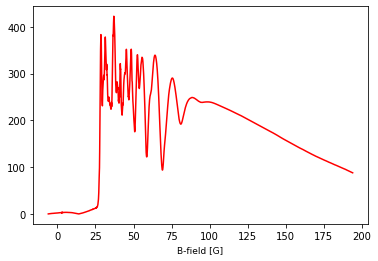

In [12]:
plt.plot(shot[0][1:],btot_average,color='red',linewidth=1.5,label='Btot')
plt.xlabel('Time [us]',fontsize=9)
plt.xlabel('B-field [G]',fontsize=9)

Run your script again. You should get a graph like the one above.